# CODE-DE/EO-Lab tutorial

<div style="text-align: right"><i> Beginner </i></div>

<center><h1> CODE-DE/EO-LAB Datenzugang vom Jupyter-Lab über BOTO3.  </h1></center>
Wir verwenden den Zugang vom Jupyter-Lab umd auf Copernicus Landdienst Daten zugreifen zu können. In diesen Fall die europaweite CORINE Landcover Klassifikation von 2018.
<br>
**General Note 1**: Ausführung der Zellen durch pressen des <button class="btn btn-default btn-xs"><i class="icon-play fa fa-play"></i></button> button vom top MENU (oder `Shift` + `Enter`).
<br>
**General Note 2**: Falls der Kern nich mehr arbeitet, im the top MENU, klicke <button class="btn btn-default btn-xs"><i class="fa fa-repeat icon-repeat"></i></button> button. Dann, im top MENU, clicke  "Run" aund wähle "Run All Above Selected Cell".
<br>
**General Note 3**: Schauen Sie sich im [**FORUM**](https://forum.code-de.org/de/) um oder Kontaktieren Sie den Support! 
<br>

In [47]:
#install required libraries
import sys
!{sys.executable} -m pip install numpy 
!{sys.executable} -m pip install rasterio
!{sys.executable} -m pip install boto3
!{sys.executable} -m pip install os
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install pandas

ERROR: Could not find a version that satisfies the requirement os (from versions: none)
ERROR: No matching distribution found for os


In [48]:
#import required libraries
import rasterio
from rasterio import plot
import boto3
import os
import numpy

In [49]:
# access CODE-DE S3 endpoint (setup the keys in the "S3 access credentials" section in your CODE-DE profile)
access_key='VPQYALBOGIKTBQALPJES'
secret_key='fWcMuTbcztZMgTbycsCcBInAEPDkTzGjaOIXMDvw'
host='http://data.cloud.code-de.org'
s3=boto3.client('s3',aws_access_key_id=access_key, aws_secret_access_key=secret_key, endpoint_url=host,)
print('Connecting to CODE-DE')

####################

response = s3.list_buckets()

# Überprüfen, ob Buckets vorhanden sind
if 'Buckets' in response:
    # Durch jeden Bucket iterieren und den Namen ausgeben
    print("I found the following buckets:")
    for bucket in response['Buckets']:
        print(bucket['Name'])
else:
    print("No buckets avabiable or no access.")


# Objekte im Bucket auflisten
response = s3.list_objects_v2(Bucket='CODEDE')
    
# Dateien ohne Unterordner anzeigen
if 'Contents' in response:
        print("Dateien im Bucket:")
        for obj in response['Contents']:
            print(obj['Key'])
else:
        print("Keine Dateien im Bucket gefunden.")



Connecting to CODE-DE
I found the following buckets:
CODEDE
EOLAB
Dateien im Bucket:

CLMS/
SMOS/
Sentinel-1/
Sentinel-2/
Sentinel-3/
Sentinel-5P/
Sentinel-6/
TerraAqua/
auxdata/
community/


Jetz wissen wir was es an Ordnern gibt auf CODE-DE/EO-Lab gibt. Mit dem Besipiel kann eine weitere Datensuche erfolgen - oder auch über die REST API.
Wir schauen uns Daten im Copernicus Landdienst an..

In [50]:
# now lets have a closer look inside CLMS
prefix = 'CLMS/Pan-European/CORINE_Land_Cover/CLC_2018/clc2018_clc2018_v2018_20_raster100m/'
response = s3.list_objects_v2(Bucket='CODEDE', Prefix=prefix, Delimiter='/')
    
# Dateien ohne Unterordner anzeigen
flist=[]
if 'Contents' in response:
        print("Dateien im Bucket:")
        for obj in response['Contents']:
            print(obj['Key'])
            flist.append(obj['Key'])
else:
        print("Keine Dateien im Bucket gefunden.") 

Dateien im Bucket:
CLMS/Pan-European/CORINE_Land_Cover/CLC_2018/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif
CLMS/Pan-European/CORINE_Land_Cover/CLC_2018/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif.aux.xml
CLMS/Pan-European/CORINE_Land_Cover/CLC_2018/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif.ovr
CLMS/Pan-European/CORINE_Land_Cover/CLC_2018/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif.vat.cpg
CLMS/Pan-European/CORINE_Land_Cover/CLC_2018/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif.vat.dbf
CLMS/Pan-European/CORINE_Land_Cover/CLC_2018/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif.vat.dbf.xml
CLMS/Pan-European/CORINE_Land_Cover/CLC_2018/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.tif.xml
CLMS/Pan-European/CORINE_Land_Cover/CLC_2018/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.txt
CLMS/Pan-European/CORINE_Land_Cover/CLC_2018/clc2018_clc2

Wir kopieren die europaweite CLC Datei für 2018 lokal in unserer Ordner - 200 MB.

In [51]:
fLocal = os.path.basename(flist[0])
    
with open(fLocal, 'wb') as data:
        s3.download_fileobj('CODEDE',flist[0], data) 

Dies ist ein graustufen TIF der 65000 x 46000 Pixeln. Wir plotten "nur" ein keines Subset mit einer Farbtafel um erst einmal etwas zu sehen.
Mehr Informationen über CORINE gibt es hier: https://land.copernicus.eu/en/technical-library/clc-product-user-manual/@@download/file

Dateiname: CLC2018_CLC2018_V2018_20.tif
Dies is nur ein Beispiel-Plot der Raster Daten. Die CLC Farbcodierung steht in: CLMS/Pan-European/CORINE_Land_Cover/CLC_2018/clc2018_clc2018_v2018_20_raster100m/CLC2018_CLC2018_V2018_20.txt


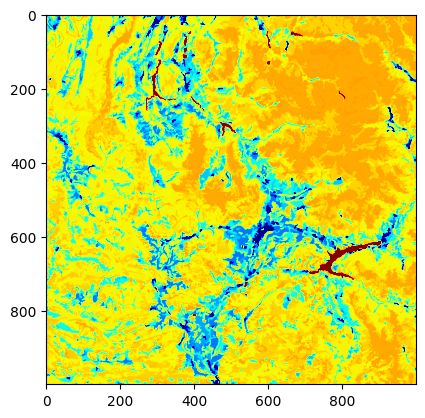

<Axes: >

In [52]:
src = rasterio.open(fLocal)
# read a subset only
data_subset = src.read(window=((30500,31500),(30500,31500)))
print("Dateiname:", fLocal)
print("Dies is nur ein Beispiel-Plot der Raster Daten. Die CLC Farbcodierung steht in:", flist[7])

plot.show(data_subset,cmap='jet',vmin=150,vmax=400)


In [53]:
#delete the downloaded file
src.close()
os.remove(fLocal)

In [54]:
# Hier ist die CORINE Codierung. Als weitere Übung könnte z.B. ein Subset über einen Vektor file angelegt und das Grauwert-Bild Farbcodiert werden.
import pandas as pd
fLocal = os.path.basename(flist[0])

#donloading the txt file
with open(fLocal, 'wb') as data:
        s3.download_fileobj('CODEDE',flist[7], data) 

# open the text file with pandas
leg = pd.read_csv(fLocal, names=['COPERNICUS', 'R', 'G', 'B','A', 'Name'])
leg   


,COPERNICUS,R,G,B,A,Name
0,111,230,0,77,255,Continuous_urban_fabric
1,112,255,0,0,255,Discontinuous_urban_fabric
2,121,204,77,242,255,Industrial_or_commercial_units
3,122,204,0,0,255,Road_and_rail_networks_and_associated_land
4,123,230,204,204,255,Port_areas
5,124,230,204,230,255,Airports
6,131,166,0,204,255,Mineral_extraction_sites
7,132,166,77,0,255,Dump_sites
8,133,255,77,255,255,Construction_sites
9,141,255,166,255,255,Green_urban_areas


In [55]:
#removing the txt file
os.remove(fLocal)